#Read Wiki aricle on NaturalLanguageProcessing
#Free Datasets:
https://archive.ics.uci.edu/ml/datasets.php

NLP is its own Subgenre of ML!

NLP serves as a lot of use cases when dealing with TEXT or UNSTRUCTURED TEXT Data. Imagine you work for Google news and you want to group News Articles by TOPIC. Or you work for a Legal Firm and you need to sift thorugh thousands of pages of legal documents to find relevant ones. 
#This is where NLP can help

#We will want to 
-Compile Documents
-Featurize Them
-Compare their Features

Example
-You have 2 documents: (the are basically single sentences)
  1-Blue House, 2-Red House
-Features Text Docs Based on Word Count: (we want the ONES). FEATURIZE based off WORD COUNT and transform BLUE HOUSE into a VECTORIZED WORD COUNT. Create a VECTOR OCUNT of all posible words
  1-Blue House - (red,blue,house) - (0,1,1)
  2-Red House - (red,blue,house) - (1,0,1)
#A DOCUMENT represented as a VECTOR of word counts is called a BAG OF WORDS
#Once we have the BAG OF WORDS VECTORS we can use COSINE similarity on the vectors to determine similarity of the DOCMUEMNTS themselves
#This is really useful bc we are treating each document as a VECTOR of FEAUTURES and we an perform MATH functions such as COSINE Similarity where we take the DOT PRODUCTS/MultofMagnitures, or other similarity metrics to find out how similar 2 text documents are to each other

#We can improve BAG OF WORDS by adjusting word counts based on their frequency in CORPUS(the group of all the documents. 
#CORPUS - COLLECTION of TEXT is called a 
#We can use TF-IDF(Term Frequency - Inverse Documents Frequency)

#TERM FREQUENCY (TF) - importance of the term within that documents 
 -TF(d,t) = number of occuranes of term T in document D
 
#INVERSE DOCUMENT FEQUNCY - importance of the term in the CORPUS
  - IDF(t) - log(D/t) where:
    -D = total number of documents
    -t = number of ducuments with the term
    
Mathmatically TF-IDF is expressed as (term X in document Y): (see slides)
 #we do this to get a WORD COUNT and also some sort of NOTATION of how important a word is, not just relevant to the document but to the entire CORPUS of all the Documents

In [ ]:
In TERM:
pip install nltk
#NLTK allows you to work with Natural Language or 
 #Text data very easy
    
#We will start out example by building a SPAM FILTER 
#with python and then your Portfo Proj will have you
#working with REAL DATA from YELP an online review 
 #site

In [1]:
#NLP with Python - Part 1
#Build a SPAM FILTER
import nltk

In [5]:
#Download Necessary Data Set
#NLTK comes with a bunch of data sets that are
#necessary in order for it to operate in certain
#ways
nltk.download_shell()
#tpye 'l' for LIST then 'ENTER', then shows you a 
#list of avaiable packages, 'ENTER' to continue
#thru list, "ENTER" until you find STOPWORDS CORPUS,
#type 'd' for DOWNLOAD, TYPE: STOPWORDS.

#So this will download STOPWORDS for you

#TYPE: 'q' to QUIT shell

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> l

Packages:
  [ ] abc................. Australian Broadcasting Commission 2006
  [ ] alpino.............. Alpino Dutch Treebank
  [ ] averaged_perceptron_tagger Averaged Perceptron Tagger
  [ ] averaged_perceptron_tagger_ru Averaged Perceptron Tagger (Russian)
  [ ] basque_grammars..... Grammars for Basque
  [ ] biocreative_ppi..... BioCreAtIvE (Critical Assessment of Information
                           Extraction Systems in Biology)
  [ ] bllip_wsj_no_aux.... BLLIP Parser: WSJ Model
  [ ] book_grammars....... Grammars from NLTK Book
  [ ] brown............... Brown Corpus
  [ ] brown_tei........... Brown Corpus (TEI XML Version)
  [ ] cess_cat............ CESS-CAT Treebank
  [ ] cess_esp............ CESS-ESP Treebank
  [ ] chat80.....

In [ ]:
#Use DATASET from UCI DATASETS (see link in notebook)
#THIS website has a ML Repository with a bunch of 
 #Datasets we can use
https://archive.ics.uci.edu/ml/index.php
#We will be using SMS Spam Collection Dataset
#its a bunch of Text(SMS data) classfied as SPAM or 
 #HAM (which is a normal text). We will use data to 
    #build Spam Detection FILTER with Python
#The file were using has more than 5000 SMS phone 
 #messages

In [8]:
#Read data in
#Using LIST COMPREHENSION
#This is a TEXTEDIT file
#STRIP open TEXT file to grab MESSAGES as a LIST of 
 #MESSAGES
messages = [line.rstrip() for line in 
    open('smsspamcollection/SMSSpamCollection')]
print(len(messages))

5574


In [12]:
print(messages[0])
#Check first message and we get STRING for the 
 #FIRST message
print(messages[50])
print(messages[2])

ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...
ham	What you thinked about me. First time you saw me in class.
spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's


In [16]:
#A COLLECTION of TEXT is called a CORPUS
#Lets PRINT out first 10 MESSAGES and NUMBER them
 #using ENUMERATE
for mess_no,message in enumerate(messages[:10]):
    print(mess_no,message)
    print('\n')
#Here we can clearly see STYLE of these TEXT 
#MESSAGES and some of them are clearly SPAM by 
#advertisements of FREE things, and other normal SPAM
#emails asking you for money or claiming your a 
#WINNER

#Due to the SPACING we can tell this is a TAB 
#SEPARATED VALUES FILE or TSV where the first COLUMN 
#is a LABEL saying whther message is normal or 
#not(ham or spam) and SECOND COL is MESSAGE iteself

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...


1 ham	Ok lar... Joking wif u oni...


2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's


3 ham	U dun say so early hor... U c already then say...


4 ham	Nah I don't think he goes to usf, he lives around here though


5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv


6 ham	Even my brother is not like to speak with me. They treat me like aids patent.


7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune


8 spam	WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. Claim code 

In [22]:
#We can read in one of the lines
messages[0]
#Notice we have HAM, '\t', and then the ACTUAL TEXT 
#MESAGE, so this indicates it a TAB SEPARATION
#so we can use PANDAS to read this in as a CSV file

#instead of just PARSING the TSV files manually 
#using python we can take advantage of PANDAS 
#knowledge to do this

'ham\tGo until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [23]:
import pandas as pd
#Use READ_CSV and make note of the SCP Arguments
#and we can also specify the desired COLUMN named 
#by passing in a LIST of NAMES
#Names=names for columns=LABEL,MESSAGE
messages = pd.read_csv('smsspamcollection/SMSSpamCollection',
            sep='\t',names=['label','message'])
messages.head()
#NOw we we have a nice DF with a Label and Message 
#String separated for us to analyze

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [25]:
messages.describe()
#We see we have less unique messages vs the actual
#message count whcih means we have repeated messages
#in there which makes sense bc some may be common 
#text meesages like 'Hey'


,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [77]:
messages.shape

(5572, 3)

In [26]:
#We can use GROUPBY to use DESCRIBE METHOD by the 
#actual LABEL, and this way you can begin to think 
#about features that separate HAM and SPAM

#GROUPBY LABEL Col
messages.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [ ]:
#As we continue we want to starting thinking about
#the FEATURES were going to be using
#With NLP a large part of this is FEATURE ENGINEERING
#The better you domain knowledge on data the better
#we can engineer features
#FEATURE ENGINEERING is a large part of SPAM 
#detection in general

In [27]:
#Make a new COLUMN to find HOW LONG TEXT 
 #MESSAGES are
#APPLY built in LENGTH function
messages['length'] = messages['message'].apply(len)
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


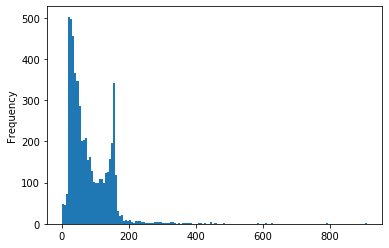

In [31]:
#Lets visualize LENGTH of MESSAGE

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

#Plot out LENGTH of Messages
messages['length'].plot.hist(bins=150)
#as you increase bin size we see BIMODAL behavior
#(peak at lower end and peak at higher end)

#We also see we have text lengths close to 1000 so
#that means there a really long text message

In [32]:
#
messages['length'].describe()
#So max Message length=910 which is very large

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

In [35]:
#Lets find this LONG MESSAGE with PANDAS MASKING
messages[messages['length'] == 910]['message']

1085    For me the love should start with attraction.i...
Name: message, dtype: object

In [37]:
#Lets find this LONG MESSAGE with PANDAS MASKING
#USE ILOC to PRINT ENTIRE STRING
messages[messages['length'] == 910]['message'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a20e90cd0>,
      dtype=object)

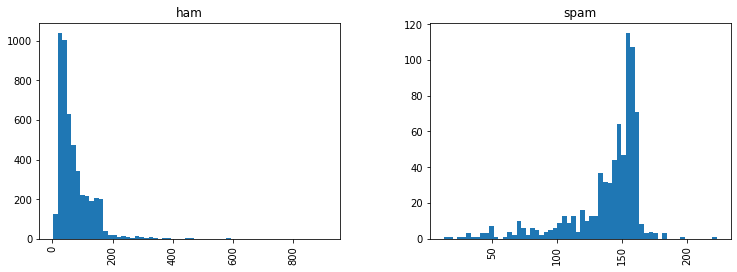

In [38]:
#Lets see if MESSAGE LENGTH is a DISTRINGUISHING 
#FEATURE between HAM and SPAM
#Do something similar we did in SEABORN by specifying
 #the COLUMN. Meaning we can make SUBPLOTS based off
    #the column(we did this in SEABORN with 
     #FACETGRID)but we will do it with PANDAS built
        #in Data Viz
messages.hist(column='length',by='label',bins=60,
              figsize=(12,4))
#Now we can see Pandas own version of FACET GRID,
#Ham vs SPAM, 2 separate columns (length on X ax), 
#and it was separated BY the LABEL COLUMN

#So SPAM MESSAGES TEND to have more characters
#Ham-centered around 50 chars, Spam-centered around 
 #150 chars
    
#So LENGTH is a good FEAUTRE to DISTINGUISH HAMM vs
  #SPAM

In [ ]:
#TEXT PREPROCCESING METHODS

#NLP with Python - Part 2

#LEarn about TEXT PREPROCCESSING since main issue with our data is its all in Text format or Strings.

The Classifcation Algorithms we learned about need some Numerical Feature Vector in order to perform the CLASSIFCAITON TASKS. 

Need to Convert STRINGS to VECTOR Format and will use BAG OF WORDS to do this. For each unique word in the text will be represented by one number

In [39]:
#We will convert Raw Message (sequence of characters 
#as string) into VECTORS (a sequence of NUMBERS)
#MESSAGE-VECTOR

#Write Function that SPLITS MESSAGE into INDIVIDUAL 
#WORDS and RETURN a LIST. We will also remove very 
#common words like: the, a, and if(these are known as
#STOP WORDS) and thats where were going to be using 
#NLTK library (thats why we downloaded STOPWORDS)

#Also use Pythons Built in STRING Library
import string

In [40]:
#Remove PUNCTUATION First
#create sample message to show how it works
mess = 'Sample message! Notice: it has punctuation.'
string.punctuation
#Get a string of various punctuations

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [41]:
#Use LIST COMPREGENSION to pass in for every 
#character and check if its not in the 
 #STRING PUNCTUATION
#So this will return only Characters and not 
  #Punctuation
nopunc = [char for char in mess if char not in string.punctuation]
nopunc
#This is now the Elements in Original Message but 
#has removed and left as BLANK the punctuation marks

['S',
 'a',
 'm',
 'p',
 'l',
 'e',
 ' ',
 'm',
 'e',
 's',
 's',
 'a',
 'g',
 'e',
 ' ',
 'N',
 'o',
 't',
 'i',
 'c',
 'e',
 ' ',
 'i',
 't',
 ' ',
 'h',
 'a',
 's',
 ' ',
 'p',
 'u',
 'n',
 'c',
 't',
 'u',
 'a',
 't',
 'i',
 'o',
 'n']

In [42]:
#Lets REMOVE STOP WORDS (common words)
#import a list of ENGLISH STOPWORDS from NLTK
from nltk.corpus import stopwords
stopwords.words('english')
#We get a LIST of all ENGLISH STOPWORDS. And we want
#to remove them bc they dont tell you any 
#Distinguishing Features

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [43]:
#Since NOPUNC is a LIST of letters
#This is a way of JOINGING ELEMENTS in a LIST 
 #together
nopunc = ''.join(nopunc)
nopunc
#Now its back to its ORIGINAL STRING form but it 
#no longer has Punctuation

'Sample message Notice it has punctuation'

In [47]:
#Lets look at whats going on with .JOIN
#example string
x = ['a','b','c','d']
x

['a', 'b', 'c', 'd']

In [49]:
#use JOIN and pass in a LIST of ELEMENTS and it will
#JOIN them and it will put in whatever String you put
#in QUOTS BEFORE JOIN as their CONCATENATION DEVICE
''.join(x)
#So leaving a BLANK will JOIN everything together
#So JOIN can be used to JOIN a List together

'abcd'

In [48]:
'++'.join(x)

'a++b++c++d'

In [54]:
nopunc

'Sample message Notice it has punctuation'

In [51]:
#Back to assignment
#SPLIT so we have a LIST
nopunc.split()
#now we have a LIST of all the words and we can now 
#use LIST COMPREHENSION to remove STOP WORDS

['Sample', 'message', 'Notice', 'it', 'has', 'punctuation']

In [53]:
#use LIST COMPREHENSION to remove STOP WORDS
clean_mess = [word for word in nopunc.split() 
    if word.lower() not in stopwords.words('english')]
clean_mess
#Now we just have important words (removed 'it' 
 #and 'has')

['Sample', 'message', 'Notice', 'punctuation']

In [56]:
messages.head(2)

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29


In [66]:
#Lets put these in a FUNCTION that we can apply to
 #entire DF
#1- REMOVE PUNCTUATION - (makes into list), then JOIN 
 #them back with JOIN method
#2- REMOVE STOP WORDS
#3- RETURN LIST of CLEANED TEXT WORDS
    
def text_process(mess):
    nopunc = [char for char in mess if char not in string.punctuation]
    
    nopunc = ''.join(nopunc)
    
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
#THIS funct is the same 3 steps we did earlier

In [63]:
#We will TOKENIZE the MESSAGE in the DF
#TOKENIZATION - term used to describe the process of
#what we just did. So convert a normal text string 
#into a LIST of TOKENS. TOKENS are the CLEANED WORDS
#that we want

#check out head again
messages['message'].head(5)

0    Go until jurong point, crazy.. Available only ...
1                        Ok lar... Joking wif u oni...
2    Free entry in 2 a wkly comp to win FA Cup fina...
3    U dun say so early hor... U c already then say...
4    Nah I don't think he goes to usf, he lives aro...
Name: message, dtype: object

In [67]:
#Lets see the output on a column
messages['message'].head(5).apply(text_process)
#So we removed any STOP WORKDS and we create LIST of 
#the TOKENS(the important words we want)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: message, dtype: object

#BE aware there lots of ways to NORMALIZE TEXT data.
#Weve only done simple stuff on it. The NLTK library has lots of built in tools and docs on other methods of NORMALIZATION. 
For ex STEMMING is a common way to continue processing TEXT data. If. your text has a bunch of SIMILAR WORDS such as 'running' , 'ran', or 'run'. Basically these words are all same just differnent versions. STEMING breaks all these down and returns 'RUN'. The issue with STEMMING is you need a reference DICTIONARY to do this. And NLTK comes with a lot of those Built it datasets and references to do this easily

#Some of these normalization methods can have trouble with SHORTHAND such as slang 'Nah' or 'U', so STEMMING wont work so great for our dataset

#VECTORIZATION 
#Currenlty we have Messages as a LIST of TOKENS
#now we need to convert each of the MESSAGES into a 
#VECTOR so ML Algoithms can understand

3 STEPS:
We'll do that in three steps using the bag-of-words model:
Count how many times does a word occur in each message (Known as term frequency)
Weigh the counts, so that frequent tokens get lower weight (inverse document frequency)
Normalize the vectors to unit length, to abstract from the original text length (L2 norm)    

In [81]:
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [69]:
#FIRST STEP - CREATE THE MATRIX
from sklearn.feature_extraction.text import CountVectorizer

#There lots of Arguments that will be passed to 
#CountVectorizer and we will specify ANALYZER to be 
#our own previously defined function
#BOW - bag of words transformer
#We will specify our own Analyzer
#FIT to TEXT DATA
bow_transformer = CountVectorizer(analyzer=
            text_process).fit(messages['message'])
#so we just created a VERY LARGE MATRIX 
  #(may take a while to finish)

In [71]:
#VOCALBULARY_ - prints total Number of VOCAB WORDS
print(len(bow_transformer.vocabulary_))
#So we hav 11425 WORDS in our VOCABULARY

11425


In [72]:
#We can take ONE SAMPLE TEXT MESSAGE and get its BAG 
#OF WORDS COUNT as a VECTOR putting to use our new 
#BowTransformer

mess4 = messages['message'][3]
print(mess4)

U dun say so early hor... U c already then say...


In [78]:
#TRANSFORM and pass in MESSAGE as an ITEM in a LIST
bow4 = bow_transformer.transform([mess4])
print(bow4)
print(bow4.shape)
#So its ONE by our ENTIRE VOCABULARY. And this means 
#there are essentually 7 UNIQUE WORDS in MESSAGE 4 and 
#thats AFTER REMOVING COMMON STOP WORDS and 2 of them 
#appear TWICE and the REST only ONCE. We can check and 
#confirm which ones appear twice

  (0, 4068)	2
  (0, 4629)	1
  (0, 5261)	1
  (0, 6204)	1
  (0, 6222)	1
  (0, 7186)	1
  (0, 9554)	2
(1, 11425)


In [79]:
#We can check and confirm which ones appear TWICE
#In BRACKETS: type at whatever Index occures Twice
bow_transformer.get_feature_names()[4068]
#So 'U' shows up twice and we saw that in the sentence
 #as well

'U'

In [80]:
bow_transformer.get_feature_names()[9554]

'say'

In [ ]:
# NLP with Python - Part 3
#So in previous lecture we saw how many times 
#specific word counts show up in each message 

In [84]:
messages.shape

(5572, 3)

In [86]:
messages.head(2)

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29


In [82]:
#We can also use .TRANSFORM METHOD on our 
#Bag Of Words Transformed Object and transform the 
#entire DF of MESSAGES

#Lets see how BagOfWords counts for entire 
#CORPUS is a large sparsed Matrix
messages_bow = bow_transformer.transform(messages['message'])
#may take a while

In [83]:
#Check SHAPE of BOW MATRIX
print('Shape of Sparse Matrix: ', messages_bow.shape)
#we have a 5572rows *11425cols

Shape of Sparse Matrix:  (5572, 11425)


In [91]:
#We can also check the amount of NON ZERO occurances
#use NNZ
messages_bow.nnz
#so we have 50548 non zero occurances

50548

In [97]:
#You can check SPARSITY by grabing a formula from
 #lecture notebook:
sparsity = (100.0 * messages_bow.nnz / (messages_bow.shape[0] * messages_bow.shape[1]))
print('sparsity: {}'.format((sparsity)))
#Sparsity =  100*Non Zero MEssages/Rows*Cols
#We get 0, thats bc we have ROUND method and if we 
#delete it we see TRUE SPARSITY 

#SPARSITY COMPARES the number of NON ZEROS messages 
#vs the actual TOTAL number of messages. It gives you
#an idea of how many ZEROS there are in your actual 
#MATRIX

sparsity: 0.07940295412668218


In [96]:
print(messages_bow.shape[0]) #number of messages=5572
print(messages_bow.shape[1]) #number of words=11425

5572
11425


In [98]:
#The term WEIGHT and NORMALIZAION can be done with
#TFIDF(TERM FREQUENCY INVERSE DOCUMENT FREQUENCY)

#We will use SKLEARN TFIDF TRANSFORMER OBJECT to do
 #that
from sklearn.feature_extraction.text import TfidfTransformer

#Make INSTANCE of TFID Transformer and FIT
tfidf_transformer = TfidfTransformer().fit(messages_bow)

#Fit BOW4
tfidf4 = tfidf_transformer.transform(bow4)

print(tfidf4)
#We have an INVERSE DOCUMENT FREQUENCY, and a TERM 
# FREQUENCY Relationship for this particular message. 
# So we have been able to TRANSFORM a simple word 
# count into a TFIDF. 

#This can be interpreted as a WEIGHT value for each 
#of these words vs the ACTUAL DOCUMENT 

  (0, 9554)	0.5385626262927564
  (0, 7186)	0.4389365653379857
  (0, 6222)	0.3187216892949149
  (0, 6204)	0.29953799723697416
  (0, 5261)	0.29729957405868723
  (0, 4629)	0.26619801906087187
  (0, 4068)	0.40832589933384067


In [101]:
#Check INVERSE DOCUMENT FREQUENCY of a PARTICULAR 
#WORD. For instance if we wanted to check Document 
#Frequency of word UNIVERSITY:

#Pass in your Vocabulaty (BOW Transfomrer)
tfidf_transformer.idf_[bow_transformer.vocabulary_['university']]
#so this gives us IDF

8.527076498901426

In [102]:
#Lets convert the ENTIRE BOW CORPUS into a TFIDF 
#CORPUS at once

messages_tfidf = tfidf_transformer.transform(messages_bow)

#There are many the data can be preprocessed and 
#vectorized and these steps involve feature 
#engineering a building a pipline. Check documenation
#when dealing with text data nad expansive collection
#on NLP. This is a very large field and many paths to 
#take. Check out links in notebook

In [103]:
#TRAIN our MODEL

#Now that we have MESSAGES represented as NUMERICAL 
#VECTORS we can TRAIN our SPAM HAM Classifier. We can 
#use any Classifcation Algorithm. The Naive Bays 
#Classifier Algorithm is a good choice

from sklearn.naive_bayes import MultinomialNB

#Create an INSTANCE of Model and FIT
spam_detect_model = MultinomialNB().fit(messages_tfidf,messages['label'])
#SO WE TRAINED EVERYTHING ON TRAINING DATA

In [104]:
#PREDICTIONS
#Classify SINGLE RANDOM MESSAGE and check out how
 #we do
#PREDICT of TFIDF4
spam_detect_model.predict(tfidf4)
#We just want first item in this output array

array(['ham'], dtype='<U4')

In [105]:
#Get first item
spam_detect_model.predict(tfidf4)[0]
#detects that TFIDF4 MESSAGE will be HAM

'ham'

In [106]:
#Lets see if we predicted CORRECTLY 
messages['label'][3]
#So we predicted CORRECTLY

'ham'

In [107]:
#If you want to run this PREDICTIION on ALL the 
#MESSAGES in our TFIDF:
all_pred = spam_detect_model.predict(messages_tfidf)
all_pred
#Now we have Ham and Spam for ALL the PREDICTION of 
 #ALL the MESSAGES

array(['ham', 'ham', 'spam', ..., 'ham', 'ham', 'ham'], dtype='<U4')

Somethings thats important to note, is that we 
TRAINED everythign on our TRAINING DATA. So this 
above evaluation we evaluated stuff on the same data 
we used for TRAINING and we should NEVER do that we 
should be SPLITTING our DATA into a TEST/TRAINING 
SET, othersiwe we dont know the true preditive power 
of our model. If we rememeber each example during 
TRAINING the ACCURACY in TRIANING data would just be 
100% even though you wouldnt be able to classify any
new messages. SO the proper way to do this is to use
Train/Test SPLIT

In [108]:
#TRAIN/TEST SPLIT
from sklearn.model_selection import train_test_split

#X = FEAUTUES=MESSAGES themselves
#y = LABEL(what we are predicting)
msg_train, msg_test, label_train, label_test = \
train_test_split(messages['message'], messages['label'], test_size=0.3)

print(len(msg_train), len(msg_test), len(msg_train) + len(msg_test))

3900 1672 5572


In [109]:
msg_train
#This is just LIST of all the TEXT

2641      Pandy joined 4w technologies today.he got job..
392     Hey so this sat are we going for the intro pil...
5158    I will come with karnan car. Please wait till ...
2184    Chinatown got porridge, claypot rice, yam cake...
3356                        Minimum walk is 3miles a day.
                              ...                        
4961            I want  &lt;#&gt;  rs da:)do you have it?
3096    Olol i printed out a forum post by a guy with ...
987     I'm in office now . I will call you  &lt;#&gt;...
5280                  Vikky, come around  &lt;TIME&gt; ..
4369    1 I don't have her number and 2 its gonna be a...
Name: message, Length: 3900, dtype: object

We have 2 OPTIONS: 
1-we can grab TRIANING DATA(list of all the TEXT), and REPEAT everything we just did (CountVectorization, Transformation, TFIDF, FIT it ect) and then run MULTINOMIAL NB


2-DATA PIPLINE FEATURE. We can run our model again and predict off the TEST SET by using SK LEARNS PIPLINES capabilities by storing an entire PIPLINE of our work flow. This is what we would do wit REAL WORLD TEXT DATA(you wont be doing all the steps we just did in previous 2 sections of this lecture series bc SK Learn has this which saves time)

In [112]:
#DATA PIPLINE FEATURE
#We will SUMMARIZE all the steps we just did into a 
 #PIPELINE so we dont have to REPEAT eveyting for 
     #DIFFERENT SETS of data
from sklearn.pipeline import Pipeline

#Make OBJECT which is an INSTANCE of PIPELINE
#PIPLINE takes STEPS Argument(pass in a LIST of 
 #everything you want to do)
    
#THE STEPS ARE EVERYTHIN WE DID ABOVE

#PASS IN LIST OF TUPLES. And the TUPLES ahve 2 elements, 
  #the NAME of PROCESS, and ACTUL MODEL you want to pass
    
#First Step:Tuple-and the tuple takes in the NAME of
#the Step, and what you want to do(first thing we did 
#was CountVectorizer with the ANALYZER=Text_Process 
#function - so this was STRING to TOKEN integer step 
#so STRING to TOKEN interger COUNT)

#Second Step: TUPLE-take those INTEGER COUNTS to get 
 #TFIDF SCORES
    
#3rd STEP: TUPLE-TRAIN on model. WE can use whatever
#method we want as a CLASSIFIER(instead of MultNB).
#we could have done RandonFORESTS

#The Strings dont really matter, their just a label
 #for us to reference later
pipeline = Pipeline([
    ('bow',CountVectorizer(analyzer=text_process)),
    ('tfidf', TfidfTransformer()),
    ('classifier',MultinomialNB()) 
    ])


In [113]:
#Now we can directly pass message TEXT DATA and 
# PIPELINE will do all the preprocessing for us. You 
# basically teat Pipeline Model as normal ESTIMATOR

#When we pass in MSG TRAIN and LABELTRAIN it does
 #the 3 steps for us in the PIPELINE, instead of us
     #doing it manually ourselves
#So this will FIT and TRAIN to all the data
pipeline.fit(msg_train,label_train)
#takes some time

#We just have to pass in actual TEXT data, you no 
# longer have to manually doing CountVectoriation or 
# TFIDF transformation. 

#Once you have done this youve created a FITTED 
 #PIPLINE OBJECT

Pipeline(memory=None,
         steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x1a214a0e60>,
                                 binary=False, decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('classifier',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [115]:
#PREDICTIONS
predictions = pipeline.predict(msg_test)

In [116]:
#CLASSIFICATION REPORT
from sklearn.metrics import classification_report

print(classification_report(label_test,predictions,))
#get a 96% ACCRUACY which is pretty good considering
#we are just dealing with TEXT data. 

              precision    recall  f1-score   support

         ham       0.95      1.00      0.97      1432
        spam       1.00      0.69      0.82       240

    accuracy                           0.96      1672
   macro avg       0.98      0.85      0.90      1672
weighted avg       0.96      0.96      0.95      1672



In [119]:
#for 3rd step use RANDOM FOREEST CLASSIFIER
 #(instead of MultNB) and see how compares
from sklearn.ensemble import RandomForestClassifier

pipeline = Pipeline([
    ('bow',CountVectorizer(analyzer=text_process)),
    ('tfidf', TfidfTransformer()),
    ('classifier',RandomForestClassifier()) 
    ])

In [120]:
pipeline.fit(msg_train,label_train)

/Users/thomascoenen/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Pipeline(memory=None,
         steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x1a214a0e60>,
                                 binary=False, decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',...
                 RandomForestClassifier(bootstrap=True, class_weight=None,
                                        criterion='gini', max_depth=None,
                                        max_features='auto',
                                        max_leaf_nodes=None,
                                        min_impurity_decrease=0.0,
                              

In [121]:
#PREDICTIONS
predictions = pipeline.predict(msg_test)

In [122]:
#CLASSIFICATION REPORT
print(classification_report(label_test,predictions,))
#Results are around the same but the F1 SCORE changed
#for SPAM

              precision    recall  f1-score   support

         ham       0.96      1.00      0.98      1432
        spam       0.97      0.76      0.85       240

    accuracy                           0.96      1672
   macro avg       0.96      0.88      0.91      1672
weighted avg       0.96      0.96      0.96      1672

